In [1]:
import pickle
import numpy as np
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from mpl_toolkits.mplot3d import Axes3D
from static_1Dfunction import *
import matplotlib
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from IPython.display import display, HTML
from matplotlib import cm
import seaborn

display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
#import
dir_name=['hom','n=1','n=2','n=3','n=4','n=5','n=6','n=7','n=8','n=9','n=1alt','n=2bis','n=3bis_1','n=3bis_2','n=4bis_1','n=4bis_2','n=4bis_3']
name_mode=['Homogeneous solution','n=1','n=2','n=3','n=4','n=5','n=6','n=7','n=8','n=9','n=1 alternative','n=2 bis','n=3 bis_1','n=3 bis_2','n=4 bis_1','n=4bis_2','n=4bis_3']

P_mode_tot=[]
W_mode_tot=[]
O_mode_tot=[]
Rains_mode_tot=[]
Stab_mode_tot=[]
Lmb_mode_tot=[]

for i in range(len(dir_name)):
    #print('Saving files for '+dir_name[i])
    with open("L100/"+dir_name[i]+"/P_mode_tot.txt", "rb") as fp:
        P_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/W_mode_tot.txt", "rb") as fp:
        W_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/O_mode_tot.txt", "rb") as fp:
        O_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/Rains_mode_tot.txt", "rb") as fp:
        Rains_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/Stab_mode_tot.txt", "rb") as fp:
        Stab_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/Lmb_mode_tot.txt", "rb") as fp:
        Lmb_mode_tot.append(pickle.load(fp))
         
   
with open("L100/param.txt", "rb") as fp:   
    param = pickle.load(fp)

dx=2*np.pi/100
L=100
x=np.arange(0,2*np.pi,dx)*(L/(2*np.pi))


N_mode=len(P_mode_tot)
print(N_mode)

17


In [3]:

# Colorblind 
color_mode=[]
color_mode.append('black')
seaborn.color_palette("colorblind")
for i in range(10):
    color_mode.append(seaborn.color_palette("colorblind")[i])

color_mode.append(seaborn.color_palette("dark")[1])
color_mode.append(seaborn.color_palette("dark")[2]) 
color_mode.append(seaborn.color_palette("dark")[3])  
color_mode.append(seaborn.color_palette("dark")[4])  
color_mode.append(seaborn.color_palette("dark")[5])
color_mode.append(seaborn.color_palette("dark")[6])



ValueError: array of sample points is empty

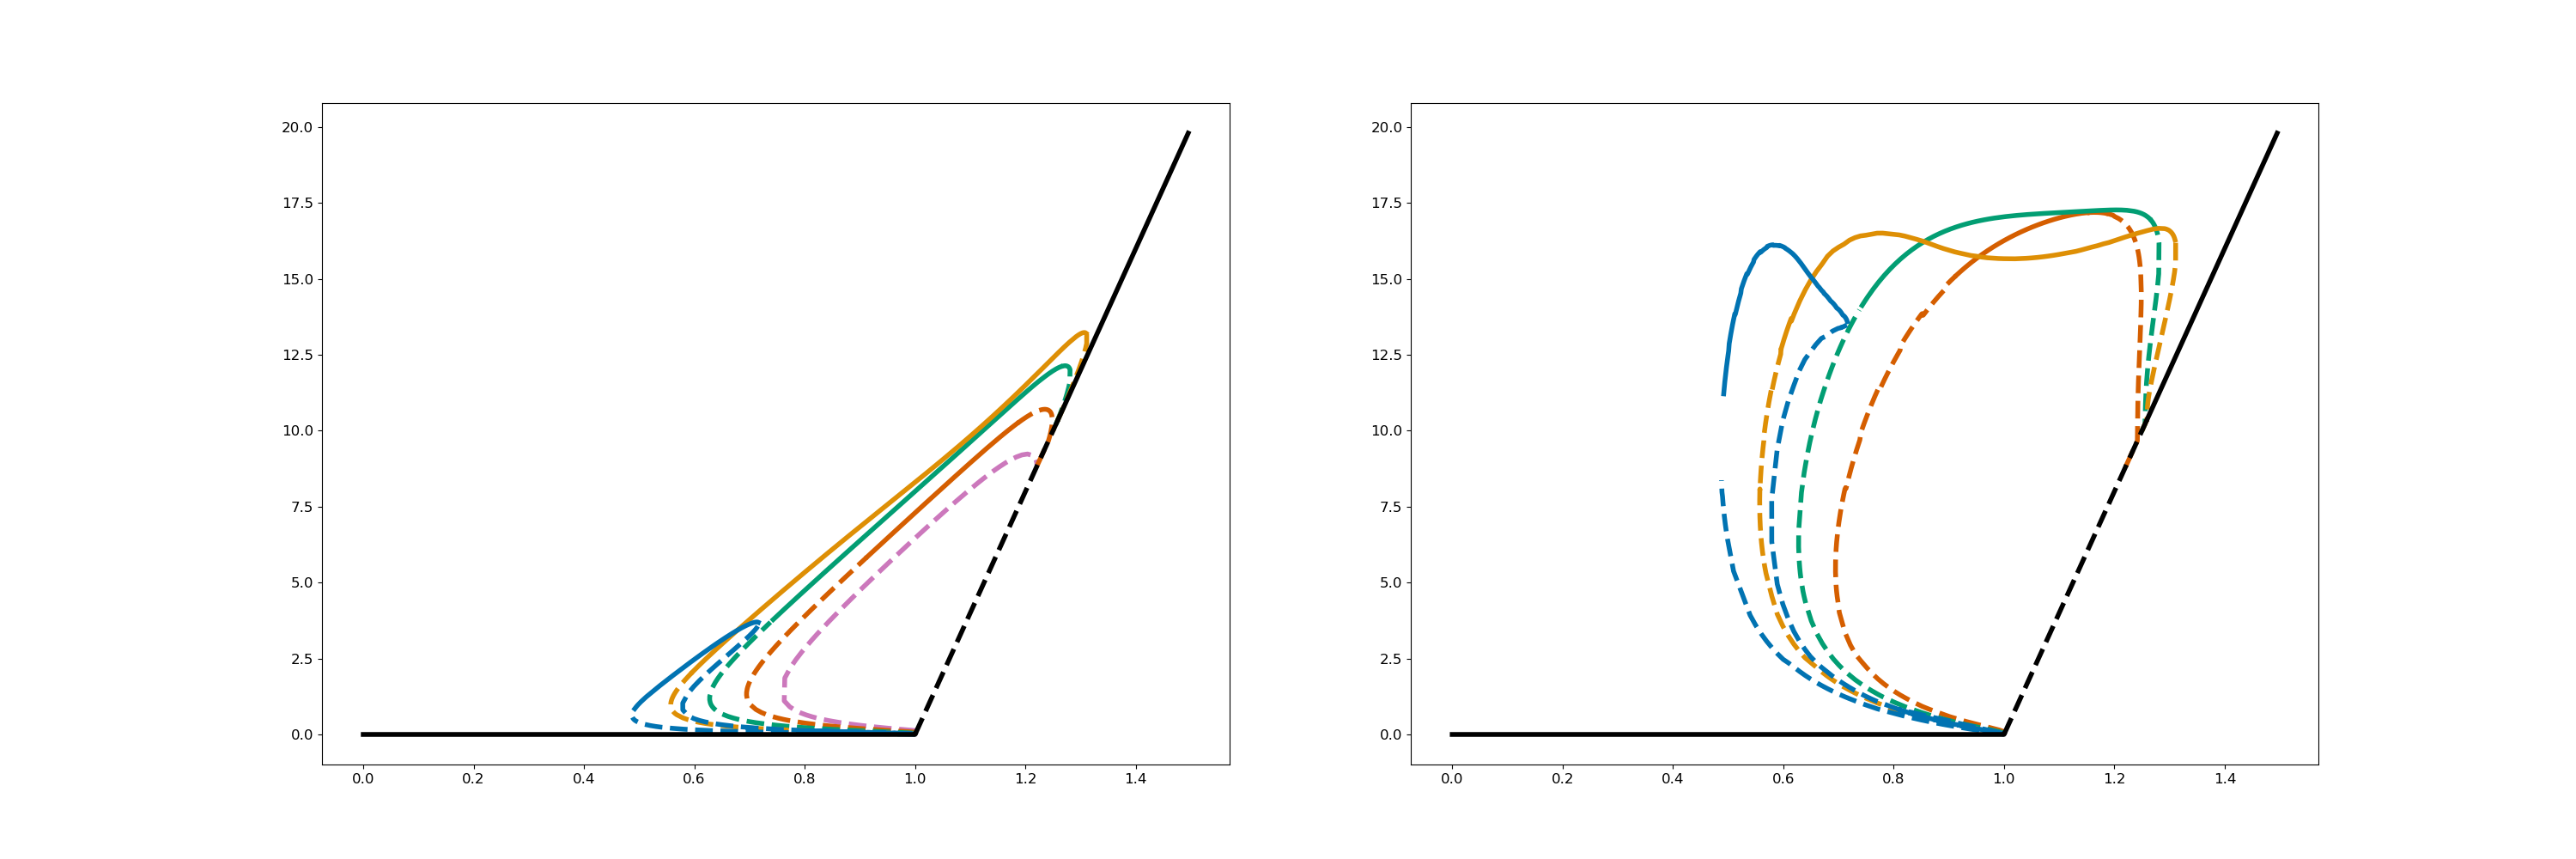

In [4]:
plt.rc('font', size=12) 
Zorder=-np.arange(0,N_mode)
fig,ax=plt.subplots(1,2,figsize=(30,10))
for i in range(N_mode):
    ax[0].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=color_mode[i],zorder=Zorder[i],linewidth=4)
    ax[0].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),markersize=4,color=color_mode[i],label=name_mode[i],linestyle='solid',zorder=Zorder[i],linewidth=4)
    ax[1].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.max(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=color_mode[i],zorder=Zorder[i],linewidth=4)
    ax[1].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.max(P_mode_tot[i],axis=1)),markersize=2,color=color_mode[i],label=name_mode[i],zorder=Zorder[i],linewidth=4)
ax[0].set_xlim(0.4,1.4)
ax[0].set_ylim(0,20)
ax[0].set_title('Mean Biomass $[g.m^{-2}]$',fontsize=25)
ax[0].set_xlabel('Rain $[mm.d^{-1}]$',fontsize=25)
ax[0].legend(fontsize=16)
ax[1].set_xlim(0.4,1.4)
ax[1].set_ylim(0,20)
ax[1].set_title('Maximum Biomass $[g.m^{-2}]$',fontsize=25)
ax[1].set_xlabel('Rain $[mm.d^{-1}$]',fontsize=25)
ax[0].tick_params(axis='both', which='major', labelsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25)
fig.savefig('figure/Bif_diag_full.png')

In [4]:
rain_i=1.4
rain_f=0.4
n_mode=0

path = 'trans_R_%.2f_%.2f_n=%d'%(rain_i,rain_f,n_mode)
print(path)

#with open(path+"/homogeneous.txt", "rb") as fp:   
#    Hom = pickle.load(fp)
    
    
with open(path+"/trans.txt", "rb") as fp:   
    trans = pickle.load(fp)

/cyfast/lvander/trans_R_1.40_0.40_n=0


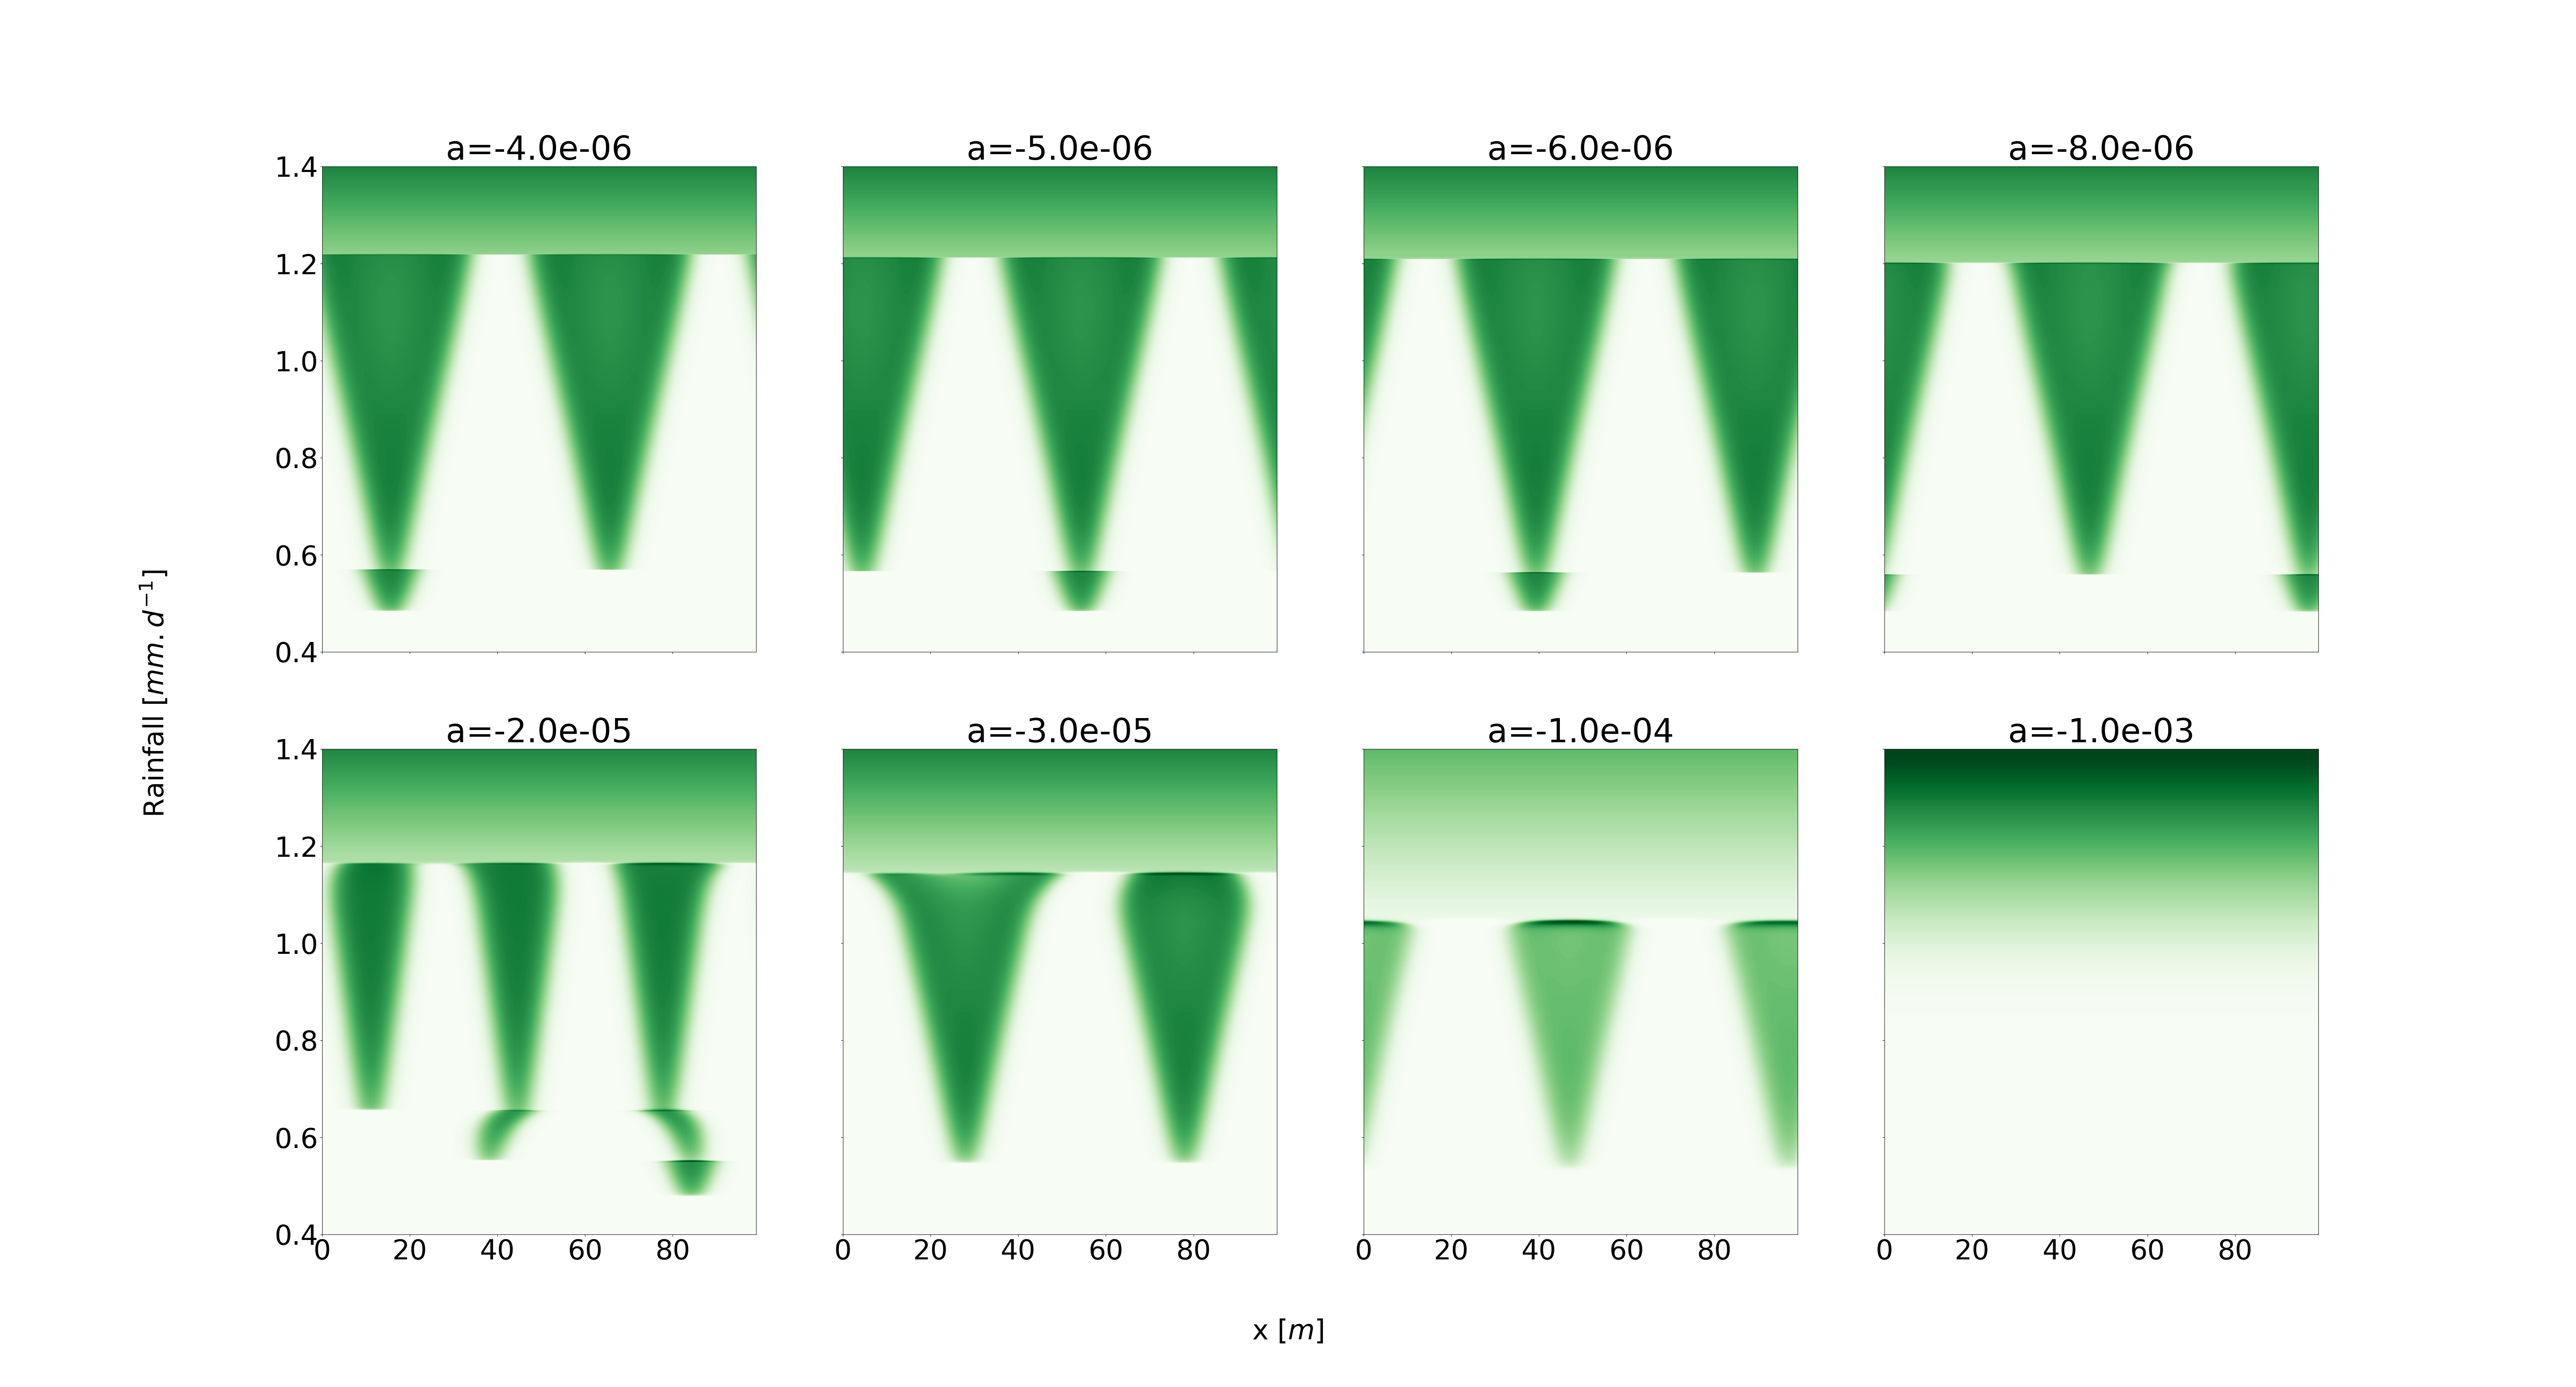

In [8]:
plt.rc('font', size=50) 
n_rate=len(trans)
t=trans[0][4]

ind_rate=4

fig,ax=plt.subplots(2,4,figsize=(65,35),sharey=True,sharex=True)
axs=[ax[0,0],ax[0,1],ax[0,2],ax[0,3],ax[1,0],ax[1,1],ax[1,2],ax[1,3]]


    
for i in range(n_rate):
    xx,rrain=np.meshgrid(x,trans[i][3])
    c=np.linspace(-.001,np.max(np.max(trans[i][0])),201)
    contB=axs[i].contourf(xx,rrain,trans[i][0],c,cmap=cm.Greens)
    #cax = plt.axes([0.95, 0.1,0.01,0.5])    
    ticks_cbar=np.linspace(0,int(np.max(np.max(trans[ind_rate][0]))),5)
    #cbar.ax.set_title('Biomass $[g.m^{-2}]$')
    #axs[i].set_xlabel('x $[m]$')
    #axs[i].set_ylabel('Rainfall $[mm.d^{-1}]$')
    axs[i].set_title('a=%.1e'%trans[i][-1])

fig.text(0.5, 0.04, 'x $[m]$', ha='center', va='center')
fig.text(0.06, 0.5, 'Rainfall $[mm.d^{-1}]$', ha='center', va='center', rotation='vertical')
#cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)

fig.savefig('figure/trans/L= %.1f_r_tipping_var1.png'%(L))

